# Итоговое задание

**Описание задания**

Есть мнение: раньше снимали настоящее кино, не то что сейчас. Ваша задача — проверить это утверждение, используя файлы с рейтингами фильмов movies_stats.csv. То есть проверить, верно ли, что с ростом года выпуска фильма средний рейтинг становится ниже.

При этом мы не будем затрагивать субъективные факторы этих рейтингов, а пройдёмся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950-го по 2010-й.


2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска (год выпуска берём из столбца title). Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
 - для каждой строки пройдите по всем годам списка years;
 - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска;
 - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.
 
 
3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’.


4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.

In [1]:
#импорт необходимых библиотек
import pandas as pd
import datetime
import matplotlib.pyplot as plt

## Знакомство с данными

In [2]:
#загрузим и прочитаем данные в переменную df
df = pd.read_csv('movies_stats.csv')

In [3]:
#знакомство с данными
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [4]:
print('Количество дублей в файле:', df.duplicated().sum())
df.describe()

Количество дублей в файле: 0


,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


**Примечание:** перед нами df из 100004 строк. В нем хранится информация о фильмах, которые были просмотрены пользователями (671 пользователь), их рейтингах, датах проката, названиях и жанрах. 
В данных нет пропусков или дубликатов, обрабатывать не нужно. Однако есть столбец timestamp с датами проката фильмов в некорректном формате, необходимо произвести его преобразование.

In [5]:
#напишем функцию для преобразования данных о дате аренды к читаемому виду
def convert_to_datetime(rental_date):
    timestamp = datetime.datetime.fromtimestamp(rental_date)
    return timestamp.strftime('%Y-%m-%d %H:%M:%S')

In [6]:
#добавим столбец с данными о дате аренды в df
df['rental_date'] = df['timestamp'].apply(convert_to_datetime)
df.head()

,userId,movieId,rating,timestamp,title,genres,rental_date
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,2009-12-14 05:52:24
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,2009-12-14 05:52:59
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,2009-12-14 05:53:02
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,2009-12-14 05:53:05
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,2009-12-14 05:53:25


**Примечание:** предобработка данных завершена. Перейдем к выполнению заданий. 

## Задание 1

В переменную years запишите список из всех годов с 1950-го по 2010-й.

In [7]:
years = list(range(1950,2011)) #создадим список years

#убедимся в том, что список создан корректно
print('Последнее значение списка', years[-1])
print('Первое значение списка', years[0])

Последнее значение списка 2010
Первое значение списка 1950


## Задание 2

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска (год выпуска берём из столбца title). Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
- для каждой строки пройдите по всем годам списка years;
- если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска;
- если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.

In [8]:
def production_year(title):
    for year in years: #пункт 1 из постановки задачи
        if str(year) in title:
            return year #пункт 2 из постановки задачи
    return 1900 #пункт 3 из постановки задачи

## Задание 3

Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’.

In [9]:
df['year'] = df['title'].apply(production_year)#добавляем новый столбец
df.head(10) #проверим корректность работы кода

,userId,movieId,rating,timestamp,title,genres,rental_date,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,2009-12-14 05:52:24,1995
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,2009-12-14 05:52:59,1900
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,2009-12-14 05:53:02,1996
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,2009-12-14 05:53:05,1981
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,2009-12-14 05:53:25,1989
5,1,1263,2.0,1260759151,"Deer Hunter, The (1978)",Drama|War,2009-12-14 05:52:31,1978
6,1,1287,2.0,1260759187,Ben-Hur (1959),Action|Adventure|Drama,2009-12-14 05:53:07,1959
7,1,1293,2.0,1260759148,Gandhi (1982),Drama,2009-12-14 05:52:28,1982
8,1,1339,3.5,1260759125,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,2009-12-14 05:52:05,1992
9,1,1343,2.0,1260759131,Cape Fear (1991),Thriller,2009-12-14 05:52:11,1991


## Задание 4

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.

**Примечание:** нужно сгруппировать данные по столбцу `year` и вывести среднюю оценку по столбцу `rating`, отфильтровав его по убыванию

In [10]:
average_ratings = df.groupby('year')['rating'].mean().reset_index()
average_ratings.head()#проверим корректность работы кода

,year,rating
0,1900,3.602960
1,1950,3.915254
2,1951,3.983539
3,1952,4.000000
4,1953,3.754587


In [11]:
#отсортируем данные по убыванию
average_ratings = average_ratings.sort_values(by='rating', ascending=False)

In [12]:
 #выведем итоговую таблицу с рейтингами по годам, отсортированным по убыванию
average_ratings

,year,rating
8,1957,4.014241
23,1972,4.011136
3,1952,4.000000
5,1954,3.994220
2,1951,3.983539
...,...,...
56,2005,3.448434
54,2003,3.444777
47,1996,3.426600
48,1997,3.415764


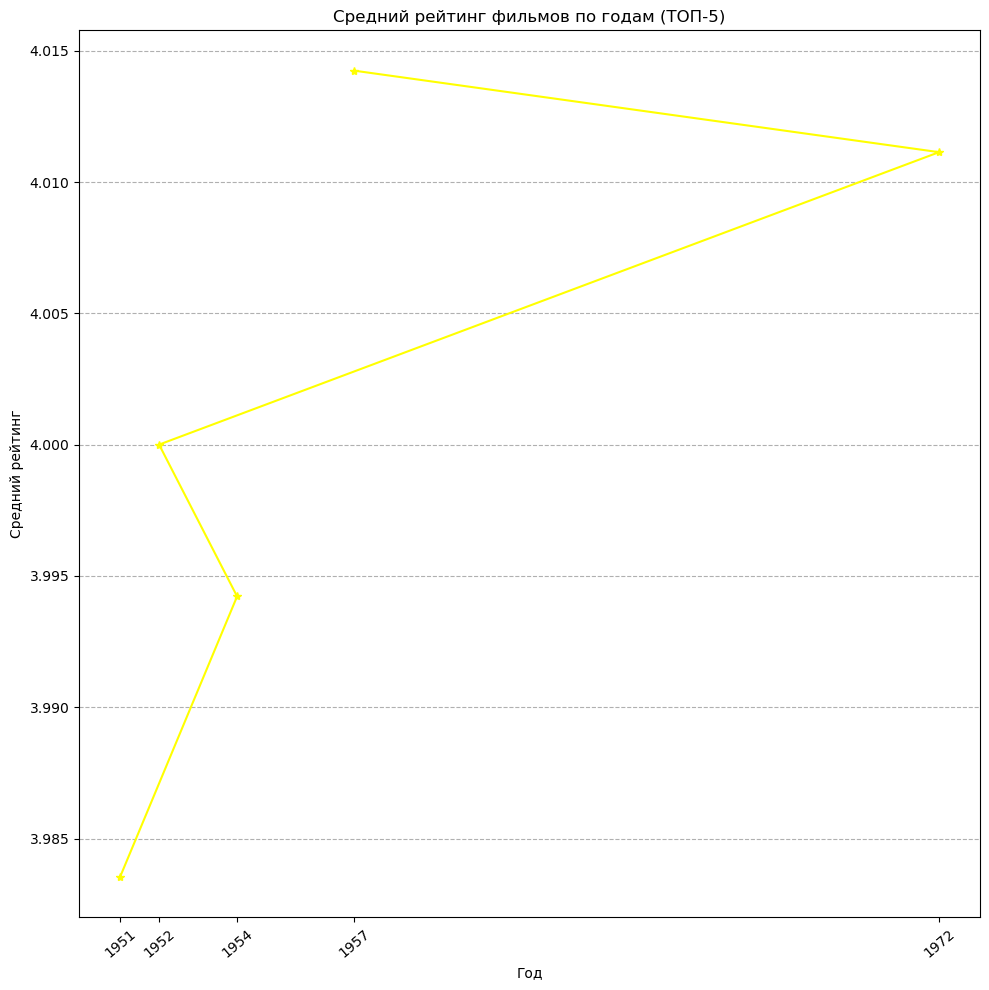

In [13]:
#для наглядности, посмотрим на топ-5 годов в кинопроизводстве

top_5 = average_ratings.sort_values(by='rating', ascending=False).head(5)

plt.figure(figsize=(10, 10))
plt.plot(top_5['year'], top_5['rating'], marker='*', linestyle='-', color='yellow')
plt.title('Средний рейтинг фильмов по годам (ТОП-5)')
plt.xlabel('Год')
plt.ylabel('Средний рейтинг')
plt.xticks(top_5['year'], rotation= 40)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Вывод
Судя по рейтингам, представленным в данном датасете, **лучшие годы кинопроизводства пришлись на период 1951-1957гг.**